In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
import plotly.express as px


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../db/StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
edu = df["parental level of education"].unique()

In [5]:
print(edu)

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [6]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
df.isnull().values.any()

False

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df_cat = df.copy()

In [10]:
df_cat.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
#Преобразование категориальных значений в колонках
df_cat["gender"] = df_cat["gender"].map({"male": 0,"female": 1 })
df_cat["race/ethnicity"] = df_cat["race/ethnicity"].map({"group A": 0,"group B": 1,
                                   "group C": 2,"group D": 3,
                                  "group E": 4,})

df_cat["lunch"] = df_cat["lunch"].map({"standard": 0,"free/reduced": 1 })
df_cat["test preparation course"] = df_cat["test preparation course"].map({"none": 0,"completed": 1})

In [12]:
races = df_cat["race/ethnicity"].unique()
lunch_types = df_cat["lunch"].unique()
prep_types = df_cat["test preparation course"].unique()

In [13]:
df_cat.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,1,bachelor's degree,0,0,72,72,74
1,1,2,some college,0,1,69,90,88
2,1,1,master's degree,0,0,90,95,93
3,0,0,associate's degree,1,0,47,57,44
4,0,2,some college,0,0,76,78,75


In [14]:
categorical_cols = df_cat.select_dtypes('object').columns.tolist()
encoder = OneHotEncoder(sparse_output=False,drop = None,
                        dtype = np.float64,
                        handle_unknown='ignore', sparse=False)

encoder.fit(df_cat[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
df_cat[encoded_cols] = encoder.transform(df_cat[categorical_cols])

with open("../model/encoder.pkl", 'wb') as f:
    pickle.dump(encoder, f)
with open("../model/encoded_cols.pkl", 'wb') as f:
    pickle.dump(encoded_cols, f)

/home/user/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
#Получение образований родителей студентов
parents_edu = encoded_cols

In [16]:
df_cat.drop(labels = ["parental level of education"], axis = 1, inplace = True)

In [17]:
df_cat.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,1,1,0,0,72,72,74,0.0,1.0,0.0,0.0,0.0,0.0
1,1,2,0,1,69,90,88,0.0,0.0,0.0,0.0,1.0,0.0
2,1,1,0,0,90,95,93,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,1,0,47,57,44,1.0,0.0,0.0,0.0,0.0,0.0
4,0,2,0,0,76,78,75,0.0,0.0,0.0,0.0,1.0,0.0


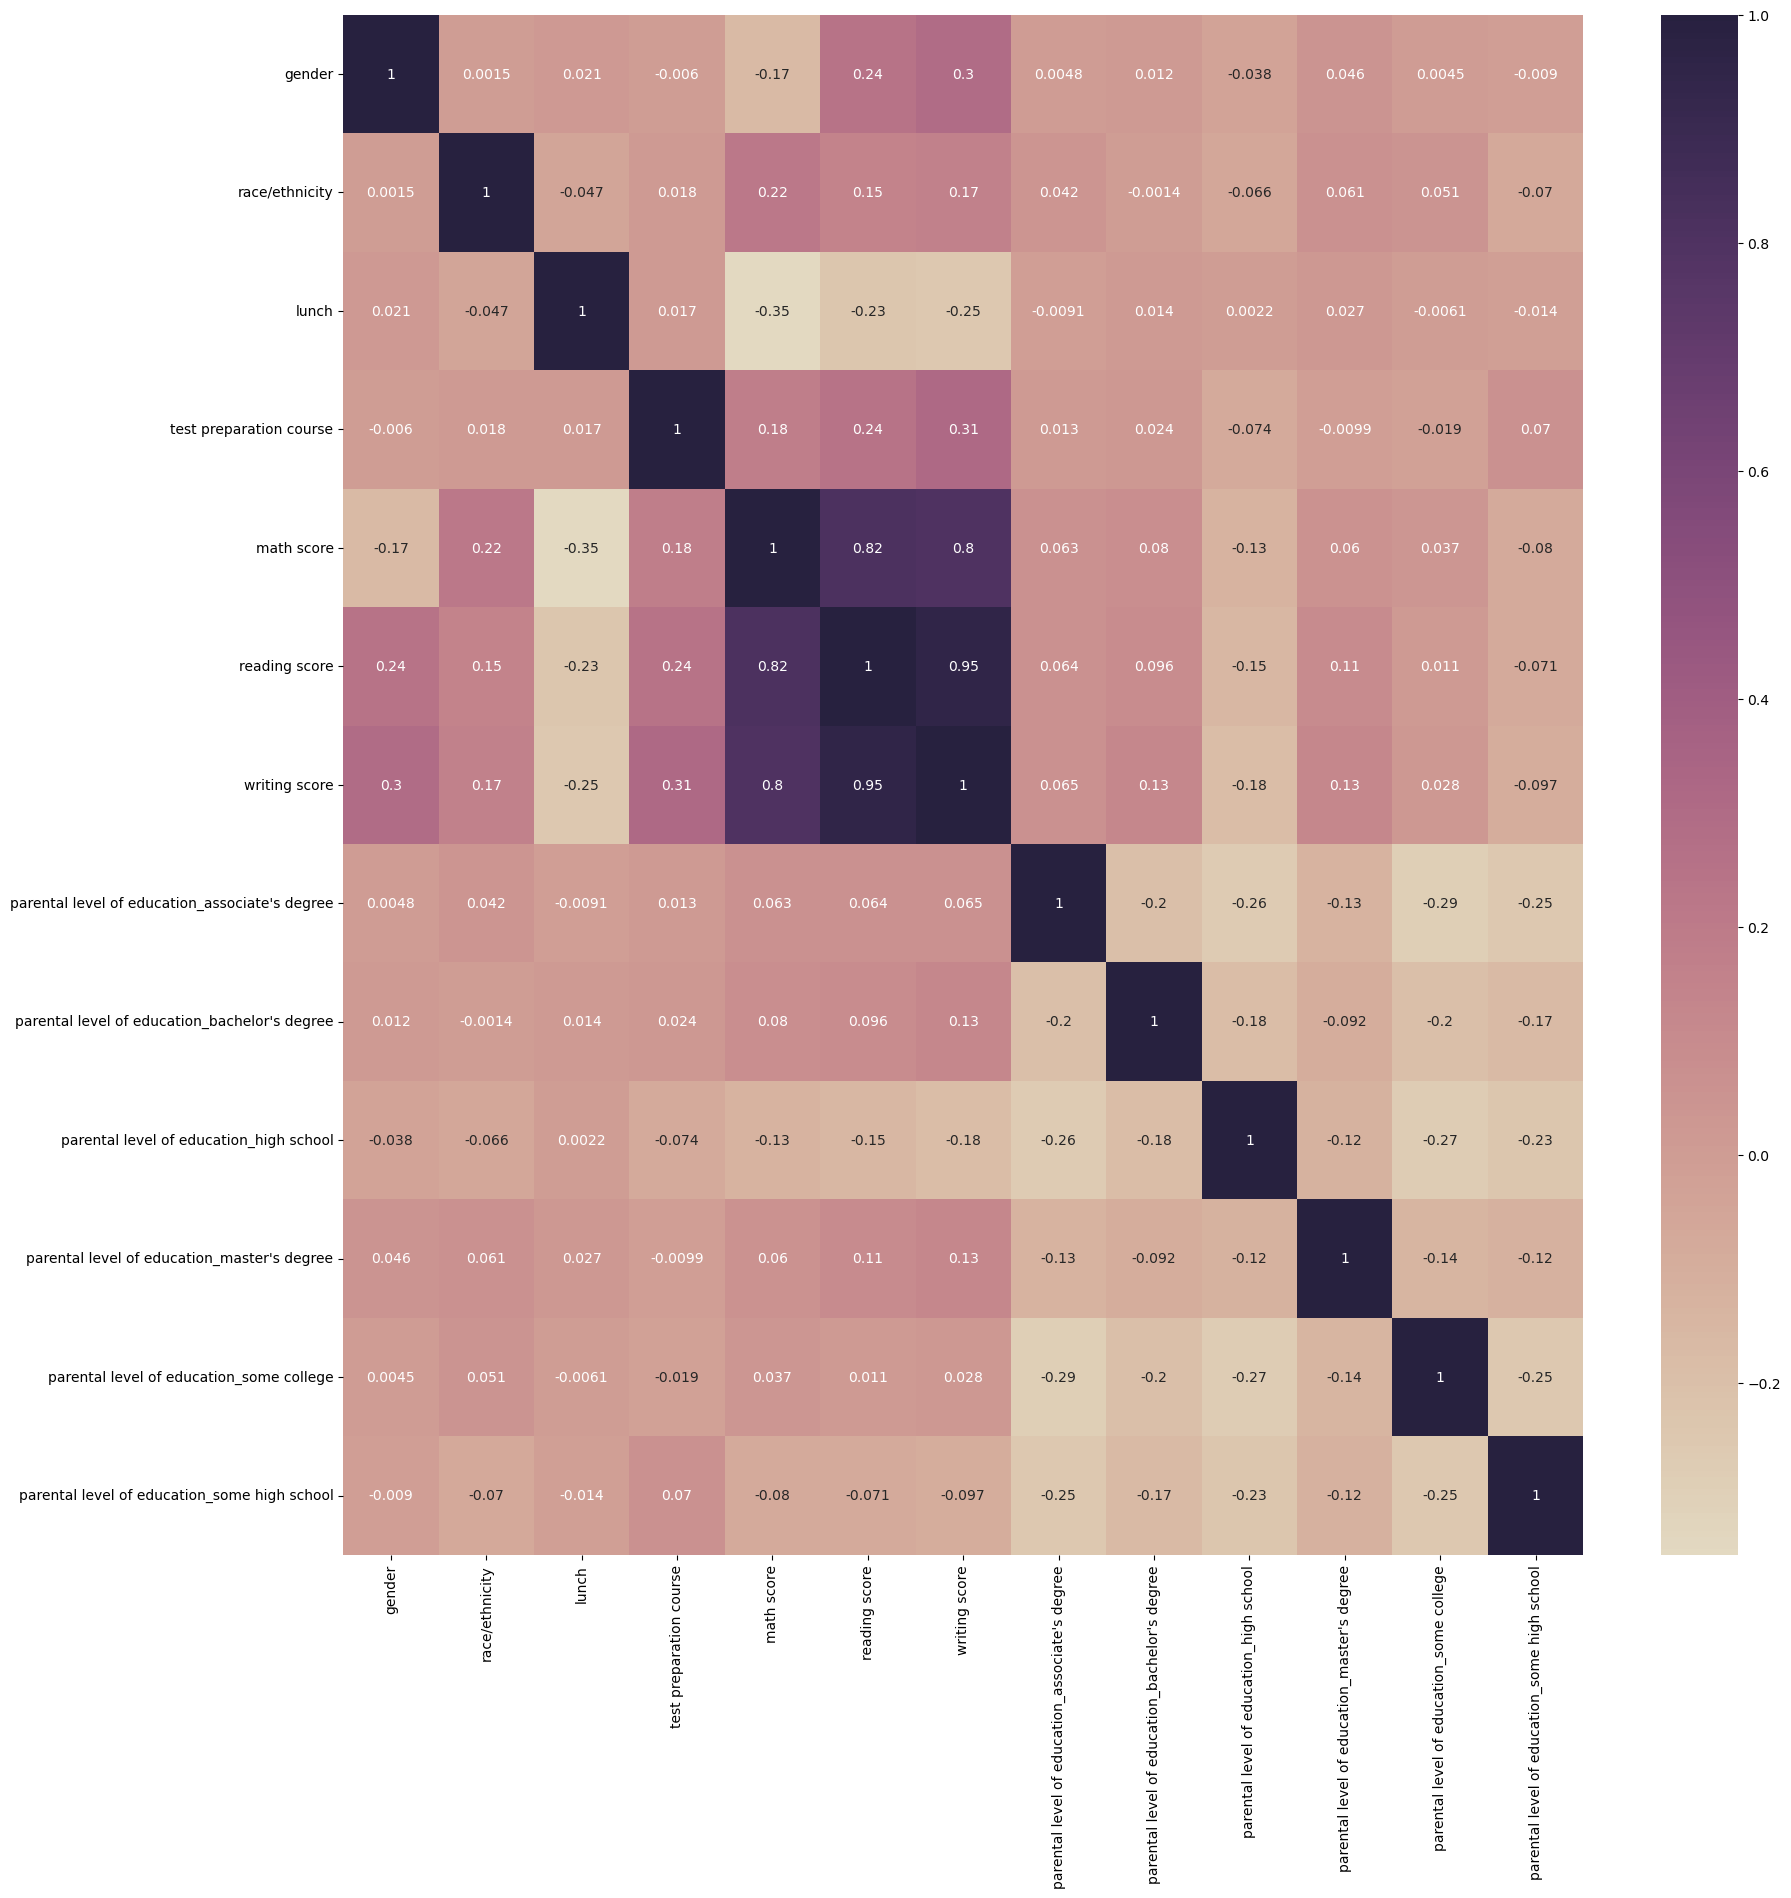

In [18]:
plt.figure(figsize=(20,20))
corr = df_cat.corr()
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

In [19]:
df_cat["test_sum"] = df_cat["writing score"] + df_cat["reading score"] + df_cat["math score"]

In [20]:
#Функция для перебора оценок по национальностям и полам
def show_difference_in_grade(df):
    for n in races:
        #Копирование датасета по национальностям
        race_df = df_cat[df_cat["race/ethnicity"] == n]
        print("Количество студентов с данной национальности:")
        print("Мужчин {}, Женщины {}, Общее количество {}".format(len(race_df[race_df["gender"] == 0]),
                                                                   len(race_df[race_df["gender"] == 1]),
                                                                   len(race_df)))
        #Здесь идет разделения используемых для таблиц датасетов, разделение идет по полу
        sns.histplot(race_df[(race_df["gender"] == 1)], x="test_sum",  bins=10, color = 'r',label="female",kde=False).set(title='Национальность {}'.format(n))
        sns.histplot(race_df[(race_df["gender"] == 0)],x="test_sum",  bins=10, color = 'b', alpha=0.4,label="male",kde=False)
        plt.legend()
        plt.show()

In [21]:
#Функция для перебора оценок по национальностям и полам, а так-же питания
def show_difference_in_grade_race_lunch(df):
    for n in races:
        #Копирование датасета по национальностям
        race_df = df[df["race/ethnicity"] == n]
        print("Количество студентов с данной национальности:")
        print("Мужчин {}, Женщины {}, Общее количество {}".format(len(race_df[race_df["gender"] == 0]),
                                                                   len(race_df[race_df["gender"] == 1]),
                                                                   len(race_df)))
        print(" ")
        
        for i in lunch_types:
            print("Количество студентов с данным типом питания:")
            print("Мужчин {}, Женщины {}, Общее количество {}".format(len(race_df[(race_df["gender"] == 0) & (race_df["lunch"] == i)]),
                                                                       len(race_df[(race_df["gender"] == 1) & (race_df["lunch"] == i)]),
                                                                       len(race_df[race_df["lunch"] == i])))
            
            #Разделяется датасет по полу, а так-же по типу обеда, что студент получает
            sns.histplot(race_df[(race_df["gender"] == 1) & (race_df["lunch"] == i)], x="test_sum",  bins=10, color = 'r',label="female",kde=False).set(title='Тип питания {} Национальность {}'.format(i,n))
            sns.histplot(race_df[(race_df["gender"] == 0) & (race_df["lunch"] == i)],x="test_sum",  bins=10, color = 'b', alpha=0.4,label="male",kde=False)
            plt.legend()
            plt.show()

Количество студентов с данной национальности:
Мужчин 86, Женщины 104, Общее количество 190
 
Количество студентов с данным типом питания:
Мужчин 56, Женщины 65, Общее количество 121


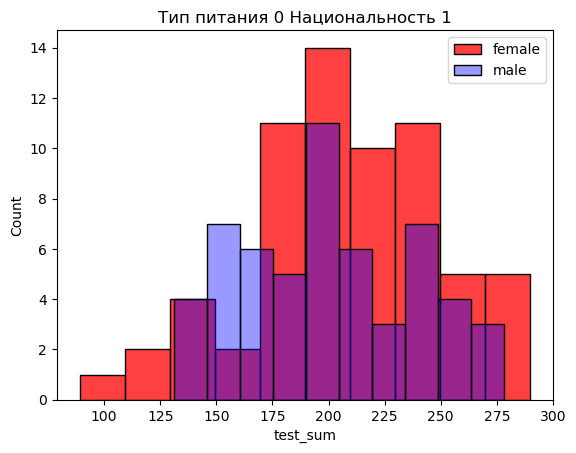

Количество студентов с данным типом питания:
Мужчин 30, Женщины 39, Общее количество 69


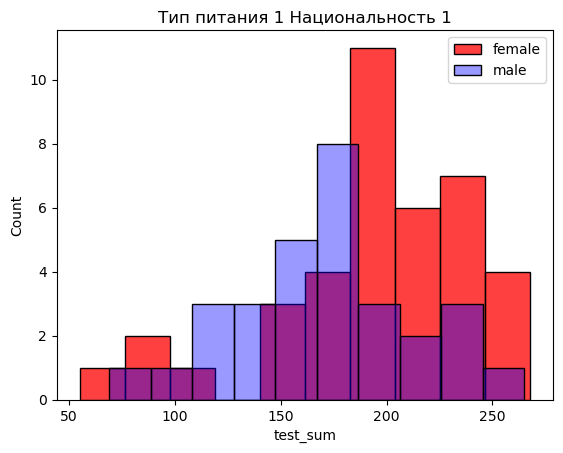

Количество студентов с данной национальности:
Мужчин 139, Женщины 180, Общее количество 319
 
Количество студентов с данным типом питания:
Мужчин 87, Женщины 118, Общее количество 205


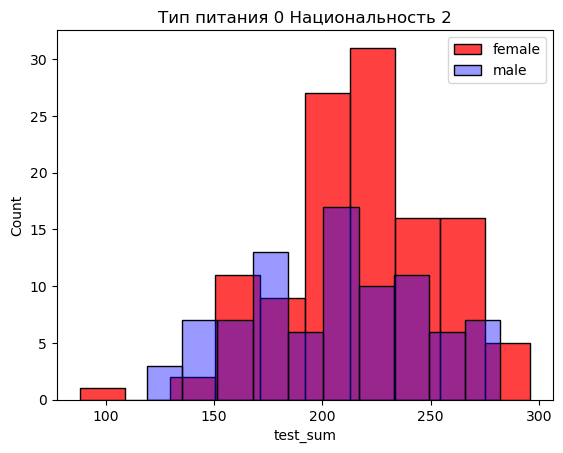

Количество студентов с данным типом питания:
Мужчин 52, Женщины 62, Общее количество 114


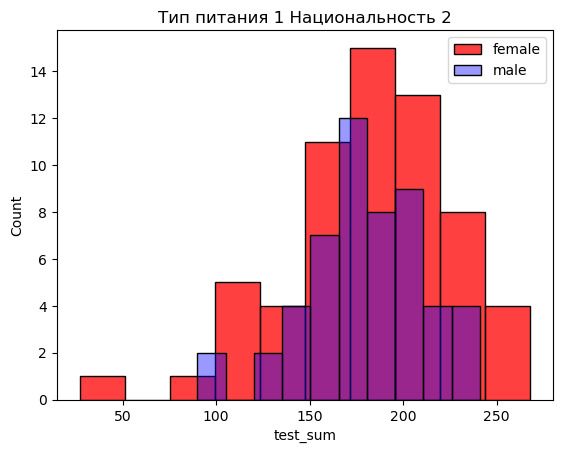

Количество студентов с данной национальности:
Мужчин 53, Женщины 36, Общее количество 89
 
Количество студентов с данным типом питания:
Мужчин 31, Женщины 22, Общее количество 53


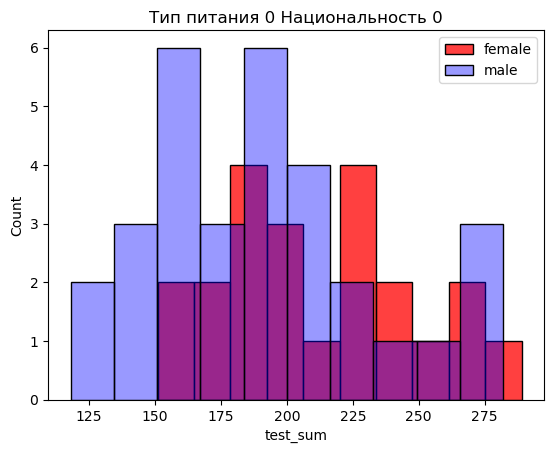

Количество студентов с данным типом питания:
Мужчин 22, Женщины 14, Общее количество 36


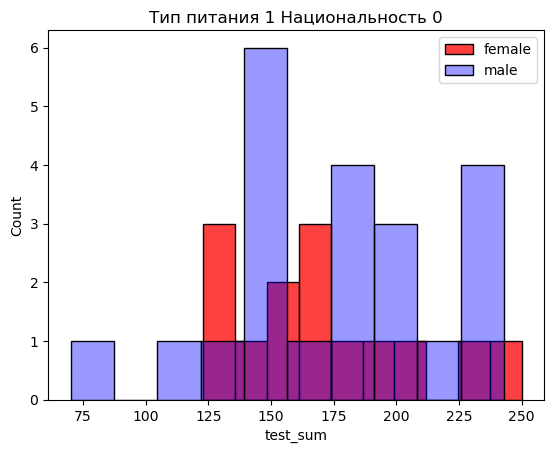

Количество студентов с данной национальности:
Мужчин 133, Женщины 129, Общее количество 262
 
Количество студентов с данным типом питания:
Мужчин 89, Женщины 78, Общее количество 167


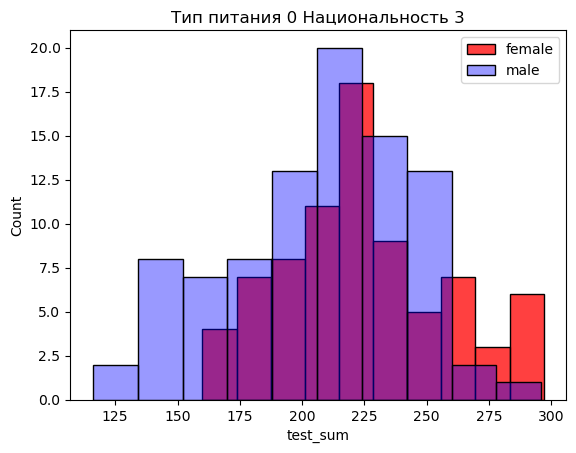

Количество студентов с данным типом питания:
Мужчин 44, Женщины 51, Общее количество 95


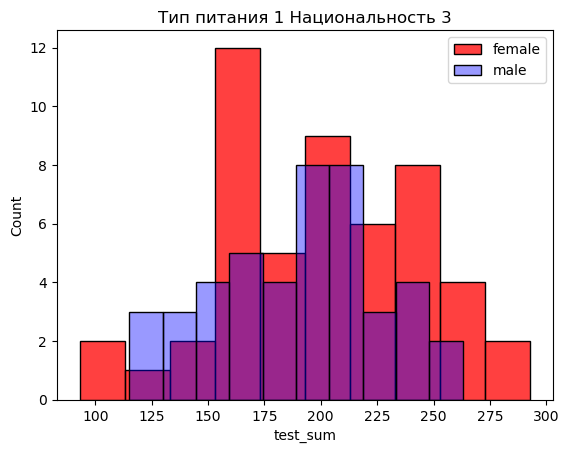

Количество студентов с данной национальности:
Мужчин 71, Женщины 69, Общее количество 140
 
Количество студентов с данным типом питания:
Мужчин 53, Женщины 46, Общее количество 99


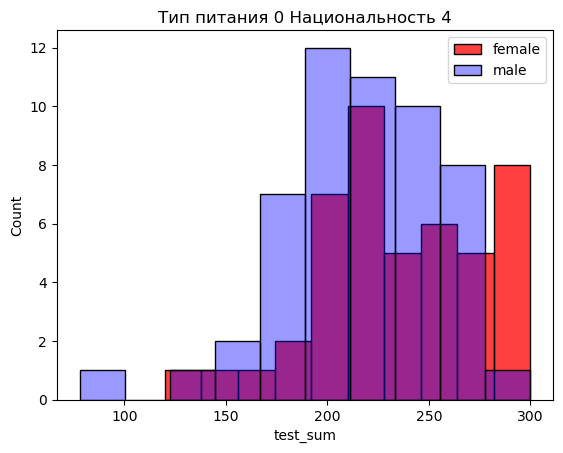

Количество студентов с данным типом питания:
Мужчин 18, Женщины 23, Общее количество 41


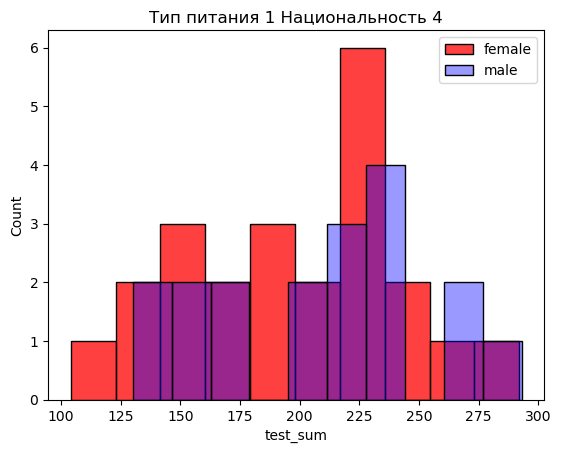

In [22]:

#Перебор средних оценок экзаменов среди национальностей различных и разных типов обедов

show_difference_in_grade_race_lunch(df_cat)


In [23]:
#Функция для перебора оценок всех раз и полов, а так-же по их типу питания
def show_mid_grades_lunch(df):
    print("Средние оценки мужского и женского пола по национальностям")
    for n in races:
        #Копирование датасета по национальностям
        race_df = df[df["race/ethnicity"] == n]
        print("Количество людей с национальностью {}".format(n))
        print(len(race_df))
        print(" ")
        
        for i in lunch_types:
            print('Оценки {} национальности с типом питания {}'.format(n, i))
            print(race_df[race_df["lunch"] == i].test_sum.sum()/(len(race_df[race_df["lunch"] == i])))
            print(" ")
            
            #Здесь берётся среднее значение оценок студента, женского пола и типу обеда.
            print('Оценки женщин национальности {} с типом питания {}'.format(n, i))
            print(race_df[(race_df["gender"] == 1) & (race_df["lunch"] == i)].test_sum.sum()/(len(race_df[(race_df["gender"] == 1) & (race_df["lunch"] == i)])))
            print(" ")
            
            #Здесь берётся среднее значение оценок студента, мужского пола и типу обеда.
            print('Оценки мужчин национальности  {} с типом питания {}'.format(n, i))
            print(race_df[(race_df["gender"] == 0) & (race_df["lunch"] == i)].test_sum.sum()/(len(race_df[(race_df["gender"] == 0) & (race_df["lunch"] == i)])))
            print(" ")
            #Конец цикла
        print(" ")

In [24]:

#Перебор средних оценок экзаменов с типом обеда

show_mid_grades_lunch(df_cat)

Средние оценки мужского и женского пола по национальностям
Количество людей с национальностью 1
190
 
Оценки 1 национальности с типом питания 0
204.0909090909091
 
Оценки женщин национальности 1 с типом питания 0
208.30769230769232
 
Оценки мужчин национальности  1 с типом питания 0
199.19642857142858
 
Оценки 1 национальности с типом питания 1
182.92753623188406
 
Оценки женщин национальности 1 с типом питания 1
192.89743589743588
 
Оценки мужчин национальности  1 с типом питания 1
169.96666666666667
 
 
Количество людей с национальностью 2
319
 
Оценки 2 национальности с типом питания 0
212.60487804878048
 
Оценки женщин национальности 2 с типом питания 0
217.98305084745763
 
Оценки мужчин национальности  2 с типом питания 0
205.31034482758622
 
Оценки 2 национальности с типом питания 1
181.23684210526315
 
Оценки женщин национальности 2 с типом питания 1
182.48387096774192
 
Оценки мужчин национальности  2 с типом питания 1
179.75
 
 
Количество людей с национальностью 0
89
 
Оценки

Количество студентов с данной национальности:
Мужчин 86, Женщины 104, Общее количество 190


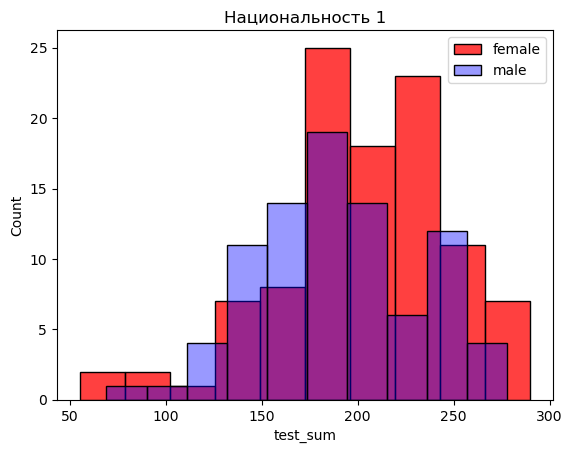

Количество студентов с данной национальности:
Мужчин 139, Женщины 180, Общее количество 319


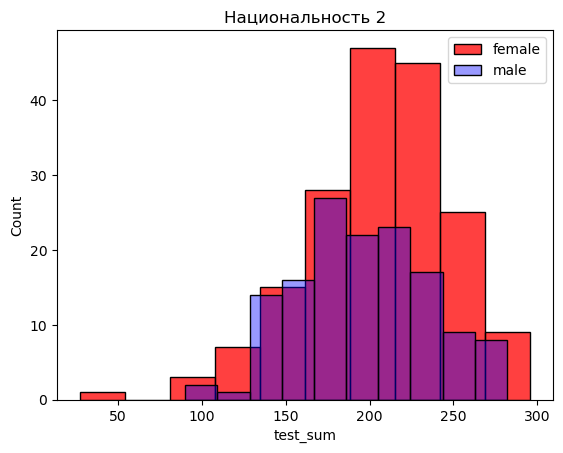

Количество студентов с данной национальности:
Мужчин 53, Женщины 36, Общее количество 89


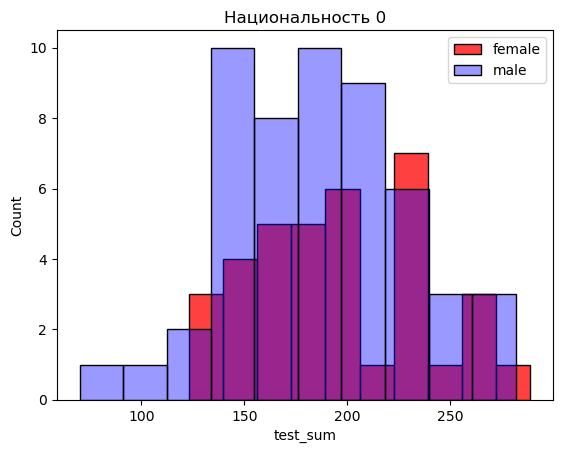

Количество студентов с данной национальности:
Мужчин 133, Женщины 129, Общее количество 262


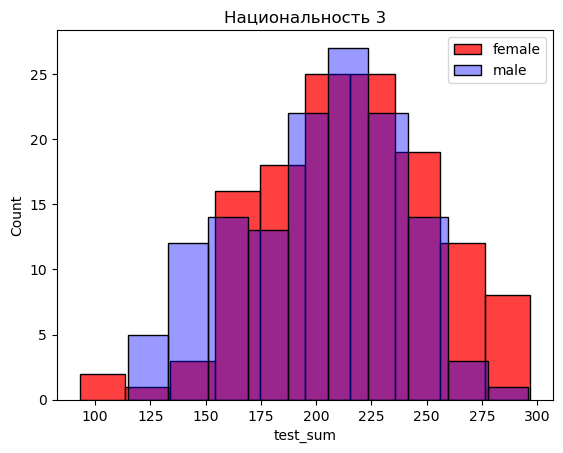

Количество студентов с данной национальности:
Мужчин 71, Женщины 69, Общее количество 140


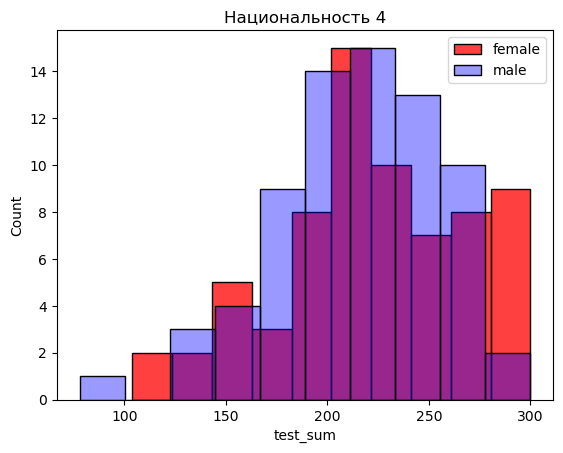

In [25]:

#Перебор средних оценок экзаменов

show_difference_in_grade(df_cat)

In [26]:
#Функция для перебора оценок всех раз и полов
def show_mid_grades(df):
    print("Средние оценки мужского и женского пола по национальностям")
    for n in races:
        #Копирование датасета по национальностям
        race_df = df[df["race/ethnicity"] == n]
        print('Оценки {} национальности'.format(n))
        print(race_df.test_sum.sum()/(len(race_df)))
        print(" ")
        
        #Здесь берётся среднее значение оценок студента, женского пола.
        print('Оценки женщин национальности {}'.format(n))
        print(race_df[race_df["gender"] == 1].test_sum.sum()/(len(race_df[race_df["gender"] == 1])))
        print(" ")
        
        #Здесь берётся среднее значение оценок студента, мужского пола.
        print('Оценки мужчин национальности  {}'.format(n))
        print(race_df[race_df["gender"] == 0].test_sum.sum()/(len(race_df[race_df["gender"] == 0])))
        print(" ")
        print(" ")

In [27]:

#Перебор средних оценок экзаменов

show_mid_grades(df_cat)

Средние оценки мужского и женского пола по национальностям
Оценки 1 национальности
196.40526315789472
 
Оценки женщин национальности 1
202.52884615384616
 
Оценки мужчин национальности  1
189.0
 
 
Оценки 2 национальности
201.3949843260188
 
Оценки женщин национальности 2
205.75555555555556
 
Оценки мужчин национальности  2
195.74820143884892
 
 
Оценки 0 национальности
188.97752808988764
 
Оценки женщин национальности 0
195.38888888888889
 
Оценки мужчин национальности  0
184.62264150943398
 
 
Оценки 3 национальности
207.5381679389313
 
Оценки женщин национальности 3
214.31782945736435
 
Оценки мужчин национальности  3
200.9624060150376
 
 
Оценки 4 национальности
218.25714285714287
 
Оценки женщин национальности 4
222.18840579710144
 
Оценки мужчин национальности  4
214.43661971830986
 
 


In [28]:
#Функция для перебора оценок по национальностям и полам
df_cat["test preparation course"].unique()
def show_difference_in_grade_with_prepare(df):
    for i in prep_types:
        #Здесь сразу определяется тип подготовки, по которому на данный момент идет и выписывается это выше графика
        if (i == 1):
            print("Количество студентов что успешно прошли подготовку к экзаменам")
        else:
            print("Количество студентов что НЕ прошли подготовку к экзаменам")
            
        #Копирование датасета по национальностям
        prep_df = df[df["test preparation course"] == i]
        
        #Здесь подсчитывается количество людей, что прошли подготовку и их пол
        print("Мужчин {}, Женщины {}, Общее количество {}".format(len(prep_df[(prep_df["test preparation course"] == i) & (prep_df["gender"] == 0)]),
                                                                   len(prep_df[(prep_df["test preparation course"] == i) & (prep_df["gender"] == 1)]),
                                                                   len(prep_df[(prep_df["test preparation course"] == i)])))
        
        #Здесь берётся среднее значение оценок студента, мужского пола и виду подготовки к экзаменам.
        sns.histplot(prep_df[(prep_df["test preparation course"] == i) & (prep_df["gender"] == 1)], x="test_sum",  bins=10, color = 'r',label="Female",kde=False).set(title='Подготовка к экзаменам {}'.format(i))
        sns.histplot(prep_df[(prep_df["test preparation course"] == i) & (prep_df["gender"] == 0)],x="test_sum",  bins=10, color = 'b', alpha=0.4,label="male",kde=False)
        plt.legend()
        plt.show()

Количество студентов что НЕ прошли подготовку к экзаменам
Мужчин 308, Женщины 334, Общее количество 642


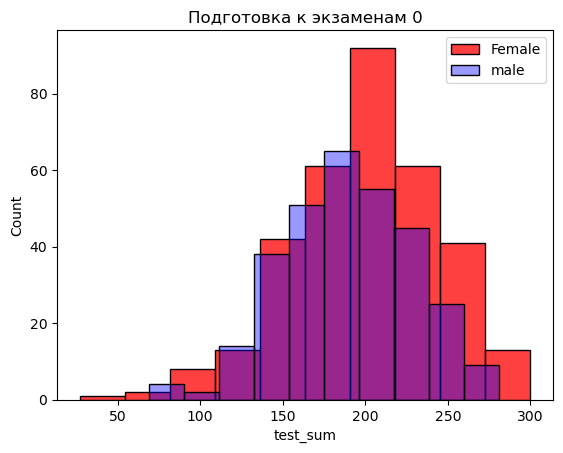

Количество студентов что успешно прошли подготовку к экзаменам
Мужчин 174, Женщины 184, Общее количество 358


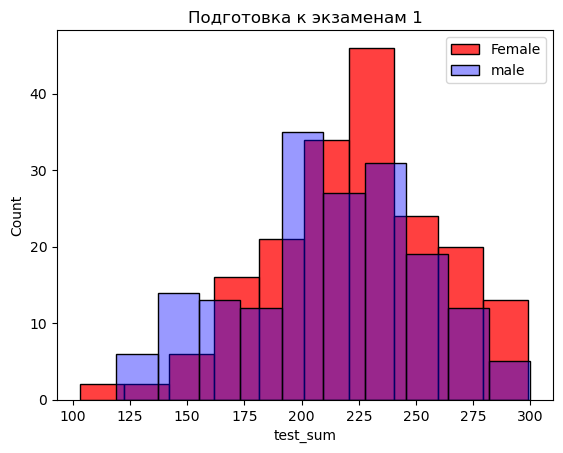

In [29]:

#Перебор оценок с подготовкой перед экзаменами

show_difference_in_grade_with_prepare(df_cat)

In [30]:
#Функция для перебора оценок по национальностям и полам, а так-же образования их родителей
def grades_difference_in_parent_degree(df):
    for n in races:
        #Копирование датасета по национальностям
        race_df = df[df["race/ethnicity"] == n]
        print("Количество студентов национальности {}:".format(n))
        print("Мужчин {}, Женщины {}, Общее количество {}".format(len(race_df[race_df["gender"] == 0]),
                                                                   len(race_df[race_df["gender"] == 1]),
                                                                   len(race_df)))
        print(" ")
        
        print("Образование их родителей:")
        #Взятый из энкоднутых колонок parents_edu здесь является данными, по которым обращается интерпритатор к переменной, 
        #после чего выводит сумму людей, у которых имеется то или иное образование
        for i in parents_edu:
            print("{} - количество {}".format(i,race_df[i].sum()) )
            
        #Такая-же песня, что и выше
        for i in parents_edu:
            print("Студенты с образованием родителей {}".format(i))
            print("Мужчин {}, Женщины {}, Общее количество {}".format(len(race_df[(race_df["gender"] == 0) & (race_df[i] == 1)]),
                                                                       len(race_df[(race_df["gender"] == 1) & (race_df[i] == 1)]),
                                                                       len(race_df[race_df[i] == 1])))
            
            #Здесь берётся среднее значение оценок студента, мужского пола и типу образования родителей.
            sns.histplot(race_df[(race_df["gender"] == 1) & (race_df[i] == 1)], x="test_sum",  bins=10, color = 'r',label="female",kde=False).set(title='Национальность {}'.format(n))
            sns.histplot(race_df[(race_df["gender"] == 0) & (race_df[i] == 1)],x="test_sum",  bins=10, color = 'b', alpha=0.4,label="male",kde=False)
            plt.legend()
            plt.show()

Количество студентов национальности 1:
Мужчин 86, Женщины 104, Общее количество 190
 
Образование их родителей:
parental level of education_associate's degree - количество 41.0
parental level of education_bachelor's degree - количество 20.0
parental level of education_high school - количество 48.0
parental level of education_master's degree - количество 6.0
parental level of education_some college - количество 37.0
parental level of education_some high school - количество 38.0
Студенты с образованием родителей parental level of education_associate's degree
Мужчин 18, Женщины 23, Общее количество 41


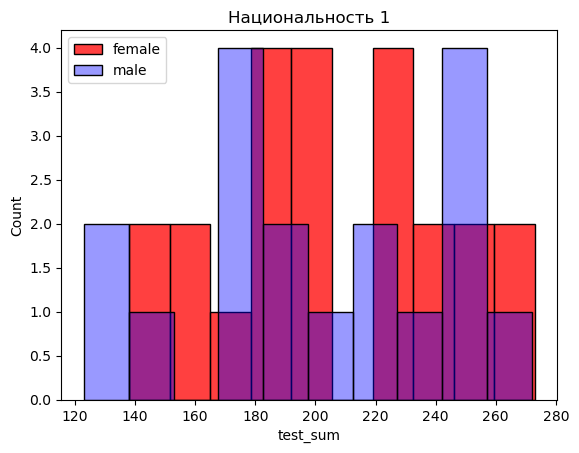

Студенты с образованием родителей parental level of education_bachelor's degree
Мужчин 9, Женщины 11, Общее количество 20


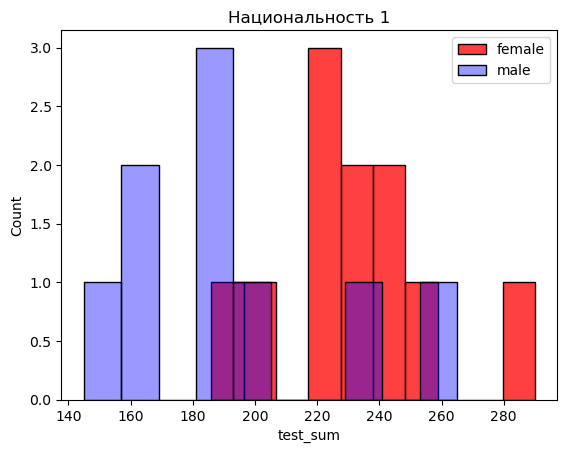

Студенты с образованием родителей parental level of education_high school
Мужчин 20, Женщины 28, Общее количество 48


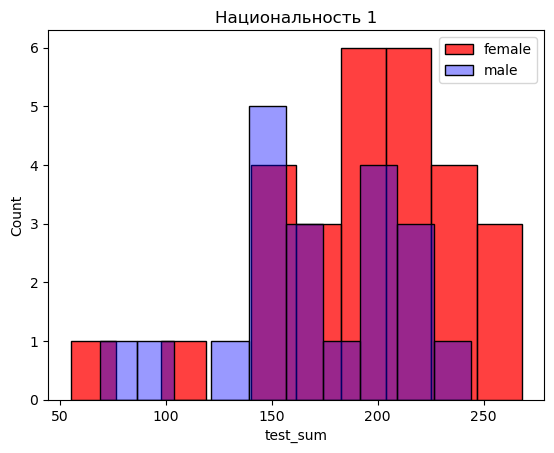

Студенты с образованием родителей parental level of education_master's degree
Мужчин 1, Женщины 5, Общее количество 6


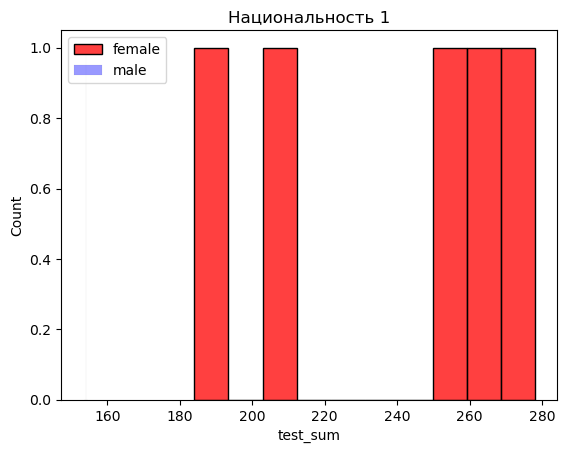

Студенты с образованием родителей parental level of education_some college
Мужчин 22, Женщины 15, Общее количество 37


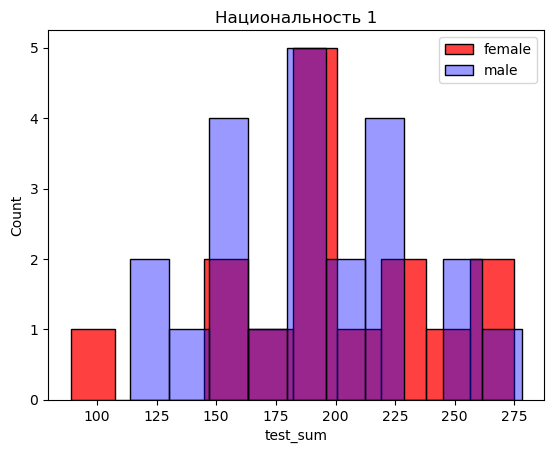

Студенты с образованием родителей parental level of education_some high school
Мужчин 16, Женщины 22, Общее количество 38


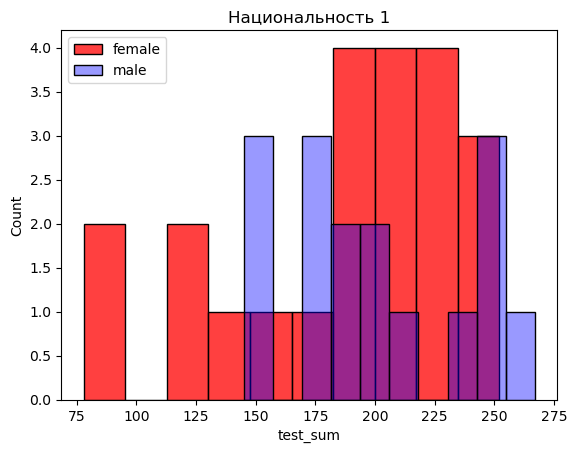

Количество студентов национальности 2:
Мужчин 139, Женщины 180, Общее количество 319
 
Образование их родителей:
parental level of education_associate's degree - количество 78.0
parental level of education_bachelor's degree - количество 40.0
parental level of education_high school - количество 64.0
parental level of education_master's degree - количество 19.0
parental level of education_some college - количество 69.0
parental level of education_some high school - количество 49.0
Студенты с образованием родителей parental level of education_associate's degree
Мужчин 33, Женщины 45, Общее количество 78


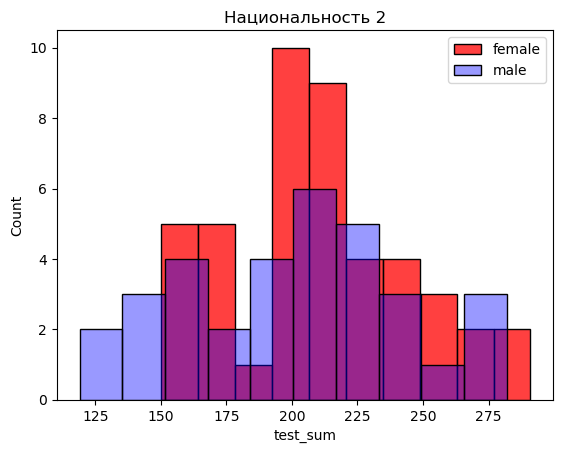

Студенты с образованием родителей parental level of education_bachelor's degree
Мужчин 14, Женщины 26, Общее количество 40


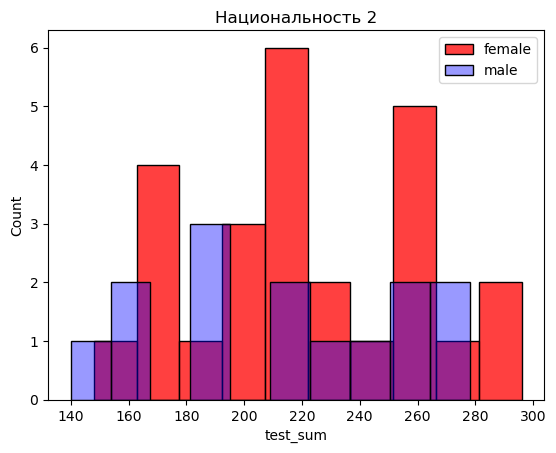

Студенты с образованием родителей parental level of education_high school
Мужчин 34, Женщины 30, Общее количество 64


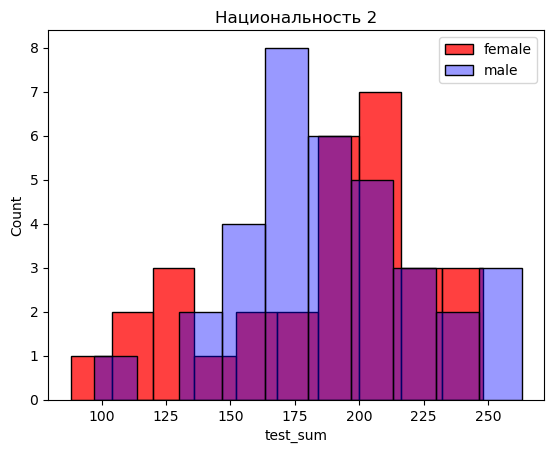

Студенты с образованием родителей parental level of education_master's degree
Мужчин 12, Женщины 7, Общее количество 19


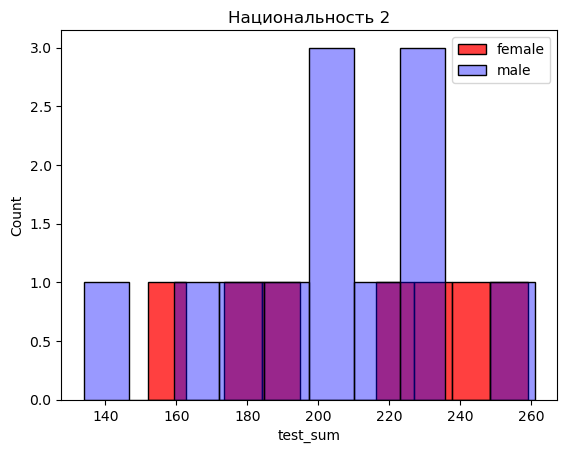

Студенты с образованием родителей parental level of education_some college
Мужчин 25, Женщины 44, Общее количество 69


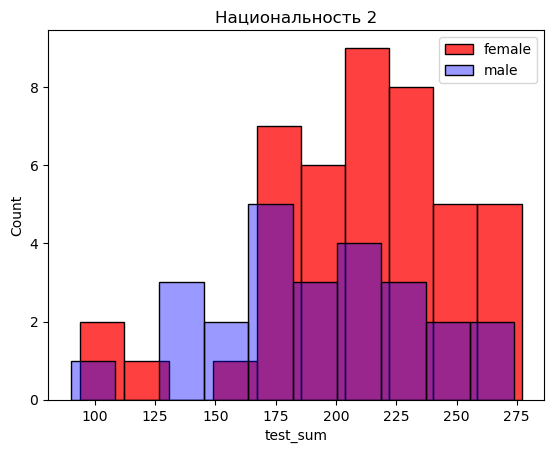

Студенты с образованием родителей parental level of education_some high school
Мужчин 21, Женщины 28, Общее количество 49


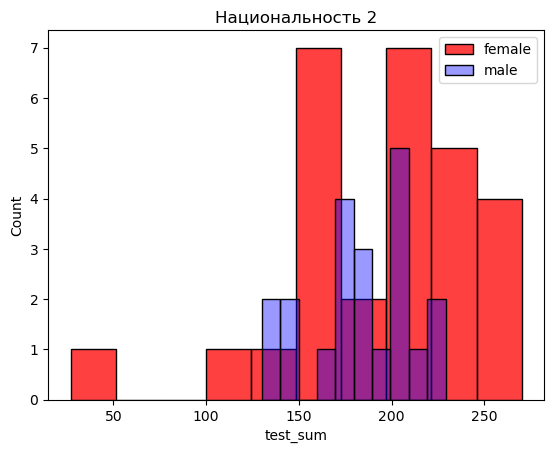

Количество студентов национальности 0:
Мужчин 53, Женщины 36, Общее количество 89
 
Образование их родителей:
parental level of education_associate's degree - количество 14.0
parental level of education_bachelor's degree - количество 12.0
parental level of education_high school - количество 18.0
parental level of education_master's degree - количество 3.0
parental level of education_some college - количество 18.0
parental level of education_some high school - количество 24.0
Студенты с образованием родителей parental level of education_associate's degree
Мужчин 8, Женщины 6, Общее количество 14


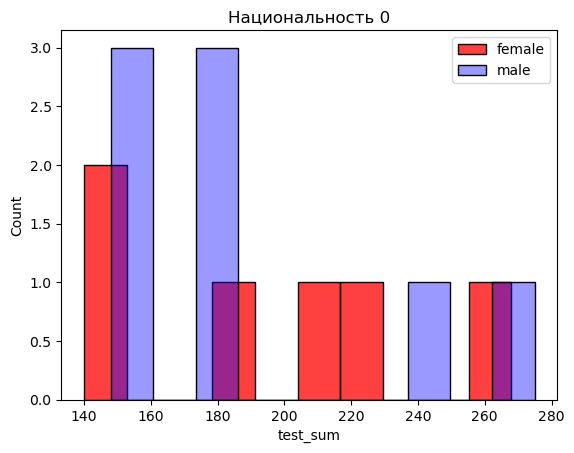

Студенты с образованием родителей parental level of education_bachelor's degree
Мужчин 9, Женщины 3, Общее количество 12


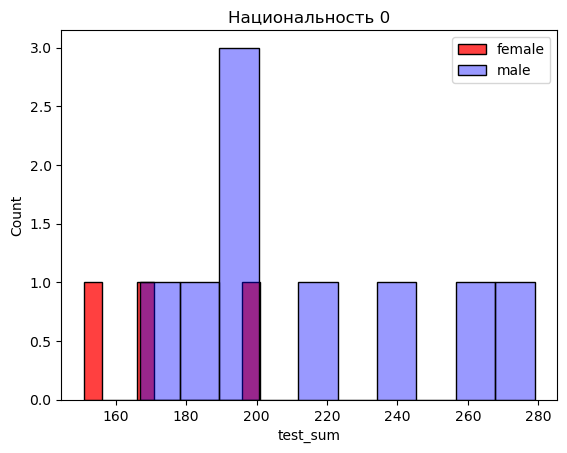

Студенты с образованием родителей parental level of education_high school
Мужчин 11, Женщины 7, Общее количество 18


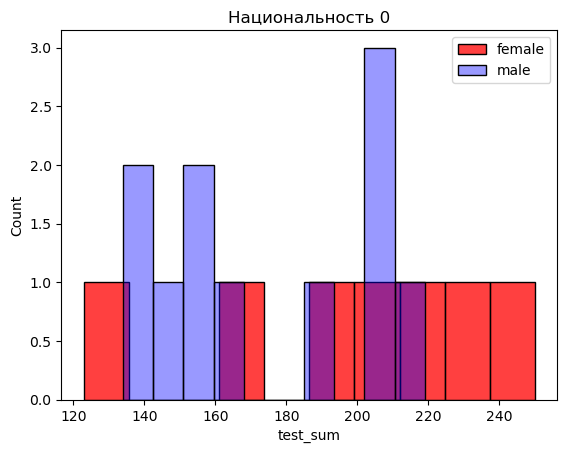

Студенты с образованием родителей parental level of education_master's degree
Мужчин 1, Женщины 2, Общее количество 3


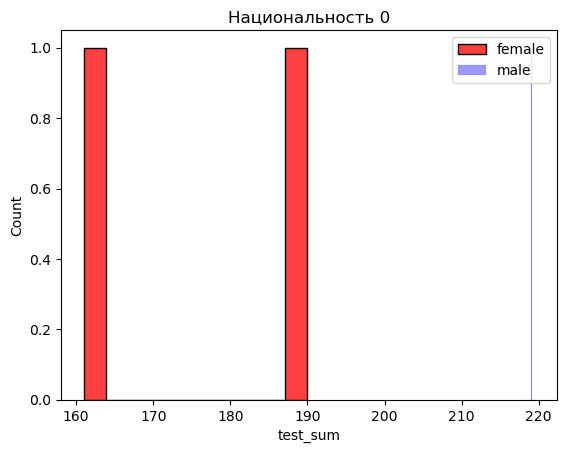

Студенты с образованием родителей parental level of education_some college
Мужчин 10, Женщины 8, Общее количество 18


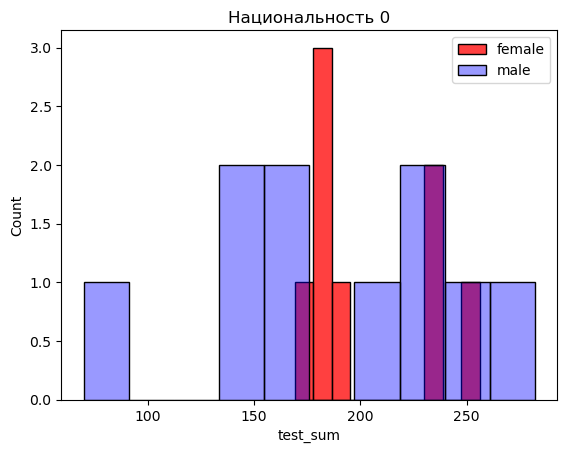

Студенты с образованием родителей parental level of education_some high school
Мужчин 14, Женщины 10, Общее количество 24


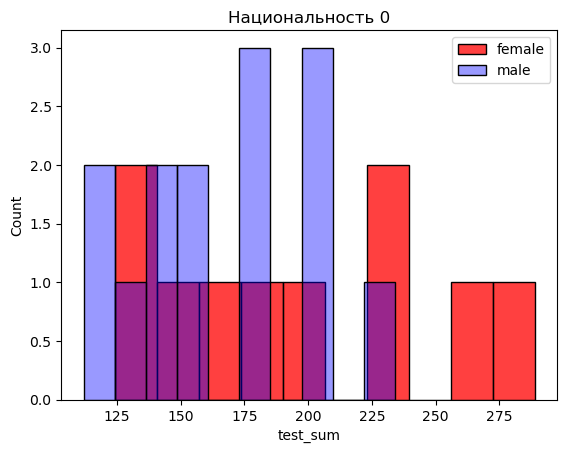

Количество студентов национальности 3:
Мужчин 133, Женщины 129, Общее количество 262
 
Образование их родителей:
parental level of education_associate's degree - количество 50.0
parental level of education_bachelor's degree - количество 28.0
parental level of education_high school - количество 44.0
parental level of education_master's degree - количество 23.0
parental level of education_some college - количество 67.0
parental level of education_some high school - количество 50.0
Студенты с образованием родителей parental level of education_associate's degree
Мужчин 26, Женщины 24, Общее количество 50


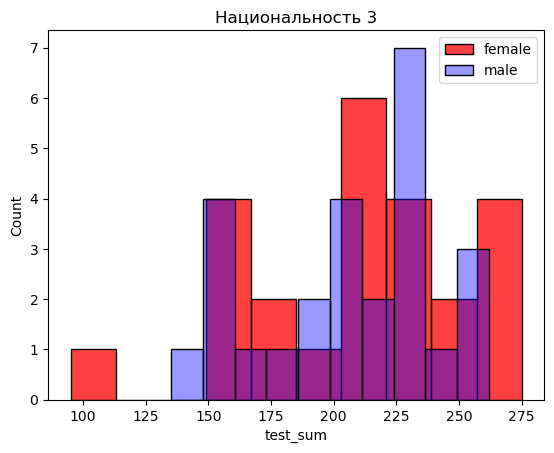

Студенты с образованием родителей parental level of education_bachelor's degree
Мужчин 15, Женщины 13, Общее количество 28


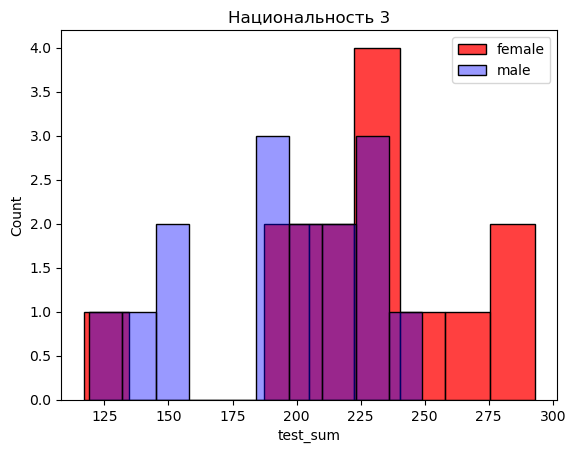

Студенты с образованием родителей parental level of education_high school
Мужчин 27, Женщины 17, Общее количество 44


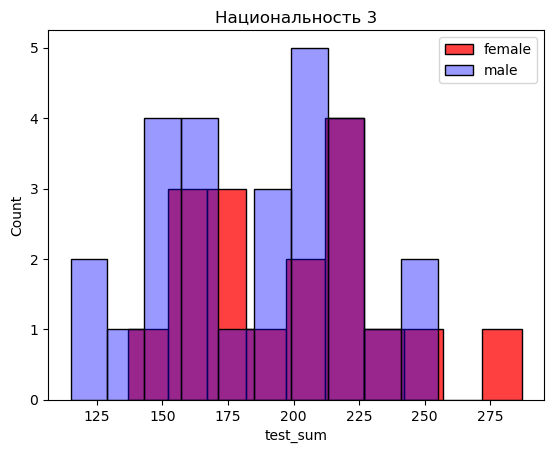

Студенты с образованием родителей parental level of education_master's degree
Мужчин 8, Женщины 15, Общее количество 23


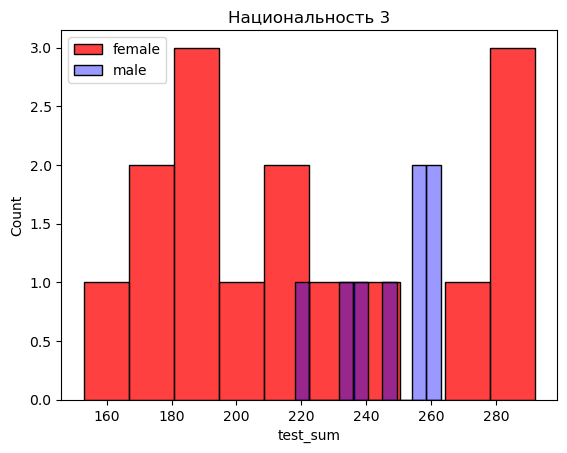

Студенты с образованием родителей parental level of education_some college
Мужчин 32, Женщины 35, Общее количество 67


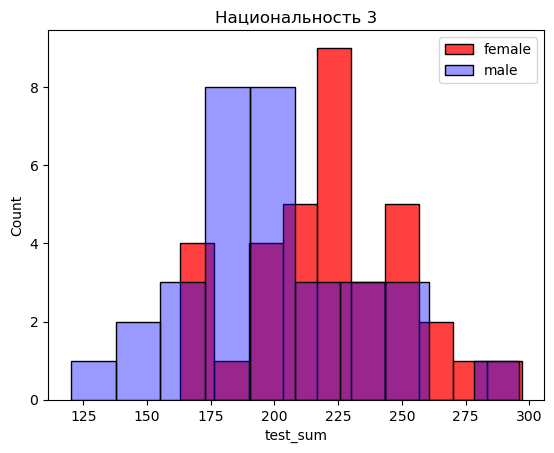

Студенты с образованием родителей parental level of education_some high school
Мужчин 25, Женщины 25, Общее количество 50


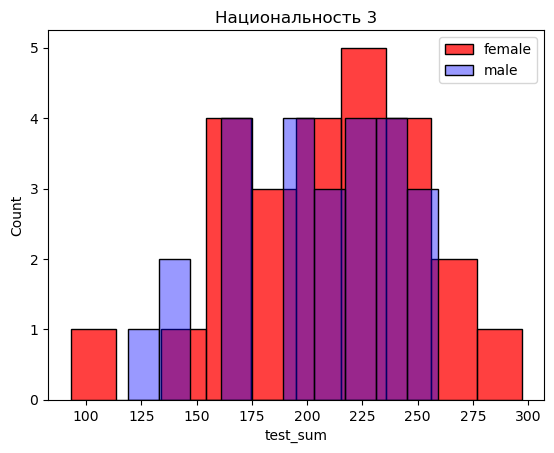

Количество студентов национальности 4:
Мужчин 71, Женщины 69, Общее количество 140
 
Образование их родителей:
parental level of education_associate's degree - количество 39.0
parental level of education_bachelor's degree - количество 18.0
parental level of education_high school - количество 22.0
parental level of education_master's degree - количество 8.0
parental level of education_some college - количество 35.0
parental level of education_some high school - количество 18.0
Студенты с образованием родителей parental level of education_associate's degree
Мужчин 21, Женщины 18, Общее количество 39


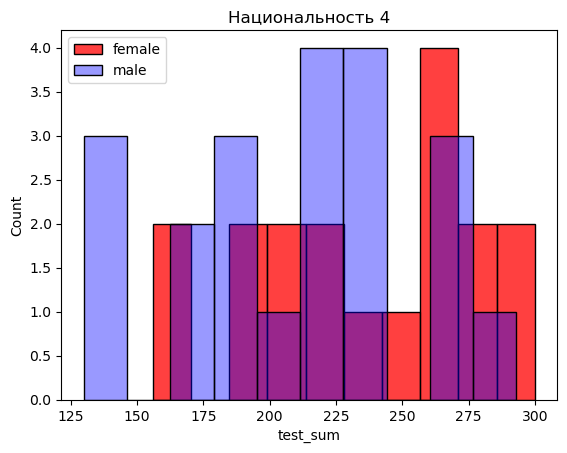

Студенты с образованием родителей parental level of education_bachelor's degree
Мужчин 8, Женщины 10, Общее количество 18


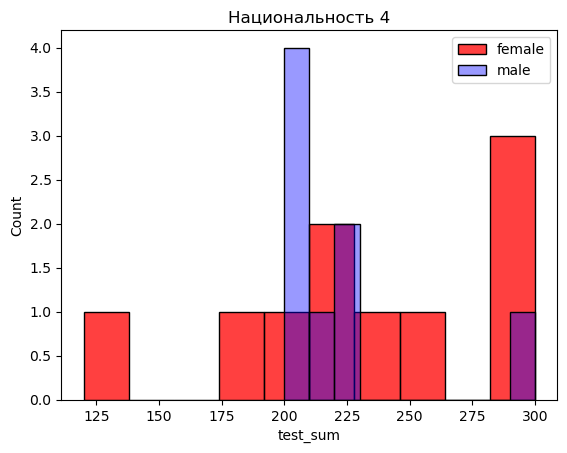

Студенты с образованием родителей parental level of education_high school
Мужчин 10, Женщины 12, Общее количество 22


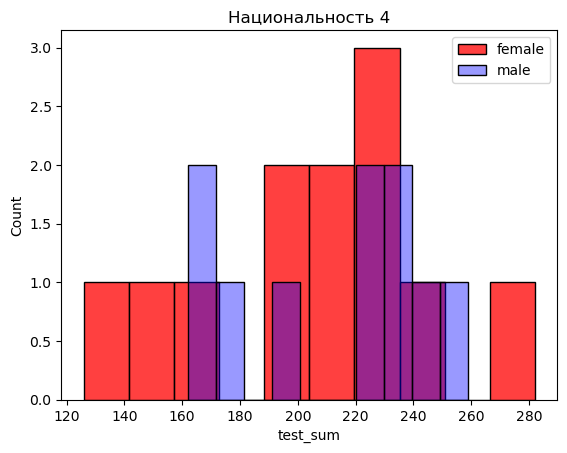

Студенты с образованием родителей parental level of education_master's degree
Мужчин 1, Женщины 7, Общее количество 8


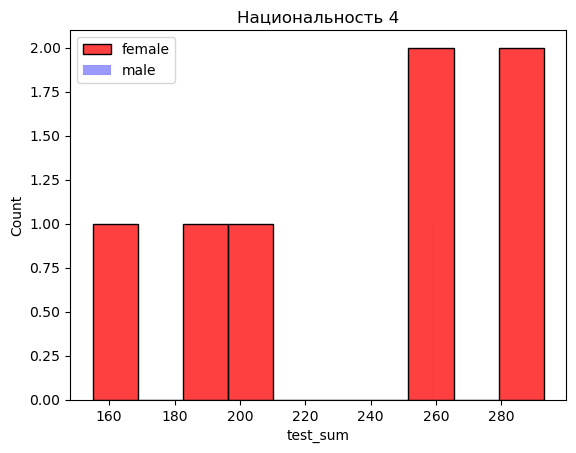

Студенты с образованием родителей parental level of education_some college
Мужчин 19, Женщины 16, Общее количество 35


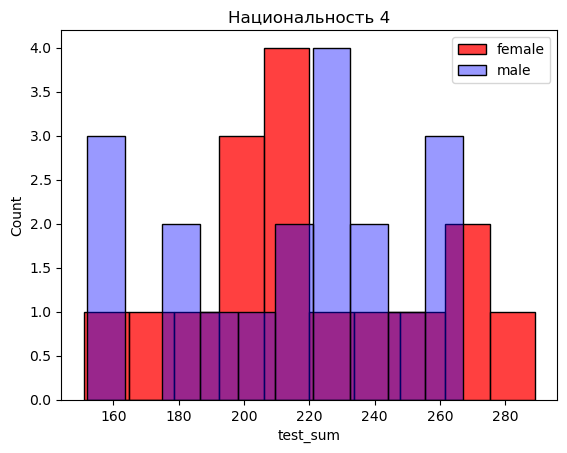

Студенты с образованием родителей parental level of education_some high school
Мужчин 12, Женщины 6, Общее количество 18


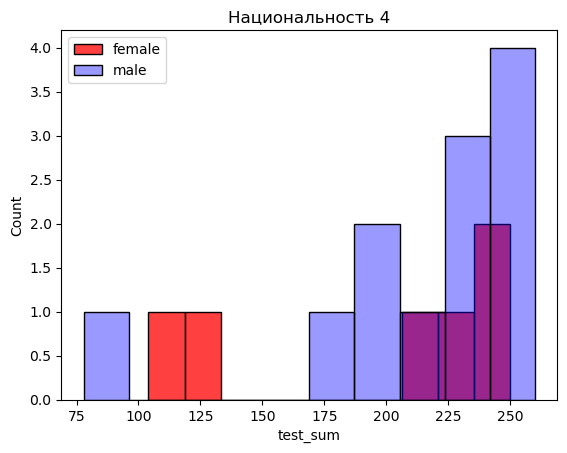

In [31]:

#Перебор оценок и образований родителей

grades_difference_in_parent_degree(df_cat)

In [32]:
#Функция для перебора оценок по национальностям и полам, а так-же питания
def grades_mid_in_parent_degree(df):
    for n in races:
        #Копирование датасета по национальностям
        race_df = df[df["race/ethnicity"] == n]
        print("Количество студентов национальности {}:".format(n))
        print("Мужчин {}, Женщины {}, Общее количество {}".format(len(race_df[race_df["gender"] == 0]),
                                                                   len(race_df[race_df["gender"] == 1]),
                                                                   len(race_df)))
        print(" ")
        
        print("Образование их родителей:")
        #Взятый из энкоднутых колонок parents_edu здесь является данными, по которым обращается интерпритатор к переменной, 
        #после чего выводит сумму людей, у которых имеется то или иное образование
        for i in parents_edu:
            print("{} - количество {}".format(i,race_df[i].sum()) )
        print(" ")
        print(" ")
        
        #Такая-же песня, что и выше
        for i in parents_edu:
            print("Студенты с образованием родителей {}".format(i))
            print("Мужчин {}, Женщины {}, Общее количество {}".format(len(race_df[(race_df["gender"] == 0) & (race_df[i] == 1)]),
                                                                       len(race_df[(race_df["gender"] == 1) & (race_df[i] == 1)]),
                                                                       len(race_df[race_df[i] == 1])))  
    
            #Здесь берётся среднее значение оценок студента, мужского пола и типу образования родителей.
            print('Оценки женщин национальности {}'.format(n))
            print((race_df[(race_df["gender"] == 1) & (race_df[i] == 1)].test_sum.sum())/(len(race_df[(race_df["gender"] == 1) & (race_df[i] == 1)])))
            
            print('Оценки мужчин национальности  {}'.format(n))
            print((race_df[(race_df["gender"] == 0) & (race_df[i] == 1)].test_sum.sum())/(len(race_df[(race_df["gender"] == 0) & (race_df[i] == 1)])))
            print(" ")

In [33]:

#Перебор средних оценок и образований родителей

grades_mid_in_parent_degree(df_cat)

Количество студентов национальности 1:
Мужчин 86, Женщины 104, Общее количество 190
 
Образование их родителей:
parental level of education_associate's degree - количество 41.0
parental level of education_bachelor's degree - количество 20.0
parental level of education_high school - количество 48.0
parental level of education_master's degree - количество 6.0
parental level of education_some college - количество 37.0
parental level of education_some high school - количество 38.0
 
 
Студенты с образованием родителей parental level of education_associate's degree
Мужчин 18, Женщины 23, Общее количество 41
Оценки женщин национальности 1
206.52173913043478
Оценки мужчин национальности  1
200.61111111111111
 
Студенты с образованием родителей parental level of education_bachelor's degree
Мужчин 9, Женщины 11, Общее количество 20
Оценки женщин национальности 1
231.27272727272728
Оценки мужчин национальности  1
192.66666666666666
 
Студенты с образованием родителей parental level of education_

In [45]:
for i in parents_edu:
    print("{} - количество {}".format(i,df_cat[i].sum()) )

parental level of education_associate's degree - количество 222.0
parental level of education_bachelor's degree - количество 118.0
parental level of education_high school - количество 196.0
parental level of education_master's degree - количество 59.0
parental level of education_some college - количество 226.0
parental level of education_some high school - количество 179.0


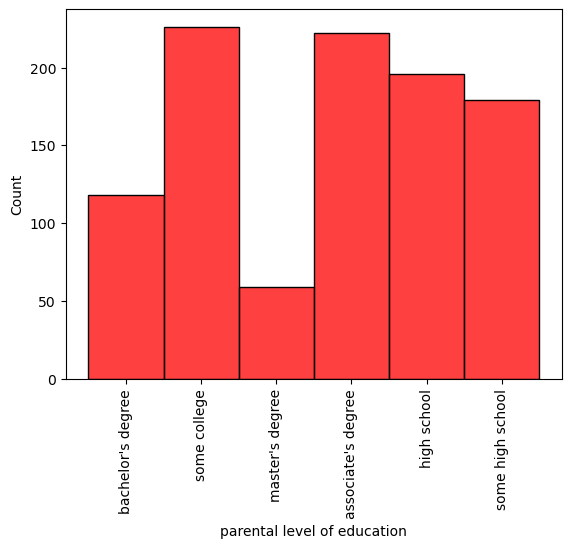

In [52]:
bob = sns.histplot(df, x = 'parental level of education', color = 'r',label="female",kde=False)
bob.tick_params(axis='x', rotation=90)

In [53]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [60]:
number_of_student_low = df[(df['math score'] < 50) & (df['reading score'] < 50) &
                           (df['writing score'] < 50)]

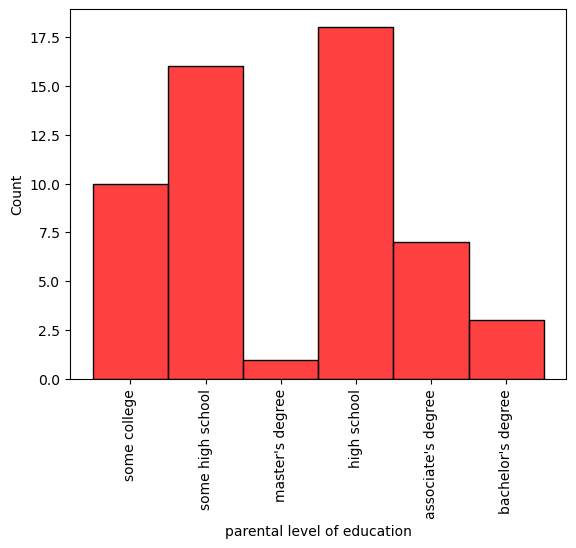

In [61]:
bob = sns.histplot(number_of_student_low, x = 'parental level of education', color = 'r',label="female",kde=False)
bob.tick_params(axis='x', rotation=90)

In [ ]:
number

In [34]:
df_cat.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test_sum
0,1,1,0,0,72,72,74,0.0,1.0,0.0,0.0,0.0,0.0,218
1,1,2,0,1,69,90,88,0.0,0.0,0.0,0.0,1.0,0.0,247
2,1,1,0,0,90,95,93,0.0,0.0,0.0,1.0,0.0,0.0,278
3,0,0,1,0,47,57,44,1.0,0.0,0.0,0.0,0.0,0.0,148
4,0,2,0,0,76,78,75,0.0,0.0,0.0,0.0,1.0,0.0,229


In [35]:
#СОХРАНЕНИЕ ДАННЫХ

In [36]:
train_df, val_df = train_test_split(df_cat, test_size=0.25, random_state=42)
train_df, test_df = train_test_split(df_cat, test_size=0.20, random_state=42)

In [37]:
#Индексы обнуляются, дабы машина потом при обучении не сдохла, путаясь в индексах

train_df.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [38]:
train_targets = [train_df["math score"].copy(),train_df["reading score"].copy(),train_df["writing score"].copy()]
val_targets = [val_df["math score"].copy(),val_df["reading score"].copy(),val_df["writing score"].copy()]
test_targets = [test_df["math score"].copy(),test_df["reading score"].copy(),test_df["writing score"].copy()]

In [39]:
train_df = train_df.drop(labels = ["math score","reading score","writing score","test_sum"], axis = 1)
val_df = val_df.drop(labels = ["math score","reading score","writing score","test_sum"], axis = 1)
test_df = test_df.drop(labels = ["math score","reading score","writing score","test_sum"], axis = 1)


In [40]:
with open("../db/Train_data.pkl", 'wb') as f:
    pickle.dump(train_df, f)
with open("../db/Val_data.pkl", 'wb') as f:
    pickle.dump(val_df, f)
with open("../db/Test_data.pkl", 'wb') as f:
    pickle.dump(test_df, f)

In [41]:

with open("../db/Targets_train_data.pkl", 'wb') as f:
    pickle.dump(train_targets, f)
with open("../db/Targets_val_data.pkl", 'wb') as f:
    pickle.dump(val_targets, f)
with open("../db/Targets_test_data.pkl", 'wb') as f:
    pickle.dump(test_targets, f)